In [1]:
import pandas as pd
import datetime as dt
import hvplot.pandas
import warnings

# Ignore specific FutureWarnings related to holoviews data handling
warnings.filterwarnings('ignore', category=FutureWarning, module='holoviews.core.data')
warnings.filterwarnings('ignore', category=FutureWarning, module='holoviews.core.util')

In [2]:
combined_df = pd.read_csv('data/combined_updated.csv')
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp']).dt.normalize()

In [3]:
combined_df[combined_df['token_id']=='giveth'].hvplot.step(x='timestamp', y='prices', by='token_id')

:NdOverlay   [token_id]
   :Curve   [timestamp]   (prices)

In [4]:
combined_df[combined_df['token_id']=='token-engineering-commons'].hvplot.step(x='timestamp', y='prices', by='token_id')

:NdOverlay   [token_id]
   :Curve   [timestamp]   (prices)

In [5]:
combined_df.hvplot.step(x='timestamp', y='prices', groupby='token_id')

:DynamicMap   [token_id]
   :Curve   [timestamp]   (prices)

In [6]:
import holoviews as hv

prices_df = combined_df
prices_df = combined_df[combined_df['timestamp'] > '2022-01-22']
prices_df = prices_df[prices_df['timestamp'] < '2023-10-10']

prices_df_adjusted = prices_df.copy(deep=True)

prices_df_adjusted[prices_df_adjusted['token_id']=='giveth'] = prices_df_adjusted[prices_df_adjusted['token_id']=='giveth'].iloc[20:]

prices_df_adjusted['normalized_prices'] = prices_df_adjusted['prices'] / prices_df_adjusted.groupby('token_id')['prices'].transform('first')

In [7]:
import datetime

def ordinal(n):
    """Return number with ordinal suffix."""
    if 10 <= n % 100 <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')
    return f"{n}{suffix}"

def formatted_date(past=False):
    """Return today's date in the desired format."""
    today = datetime.date.today()
    month = today.strftime('%b')
    day = ordinal(today.day)
    year = today.year
    if past:
        year = year - 2
    return f"{month} {day} {year}"

print(formatted_date())

May 22nd 2024


In [8]:
today = formatted_date()
past = formatted_date(past=True)

plot = prices_df_adjusted[prices_df_adjusted['token_id']!='ethereum'].hvplot.line(logy=False, legend='top_right', grid=True, rot=45, title=f'Public Goods Tokens Normalized against Ethereum {past} - {today}',x='timestamp', y='normalized_prices', by='token_id', width=1400, height=600, line_width=3)# * hv.HLine(1)
plot

:NdOverlay   [token_id]
   :Curve   [timestamp]   (normalized_prices)

Plot results: 

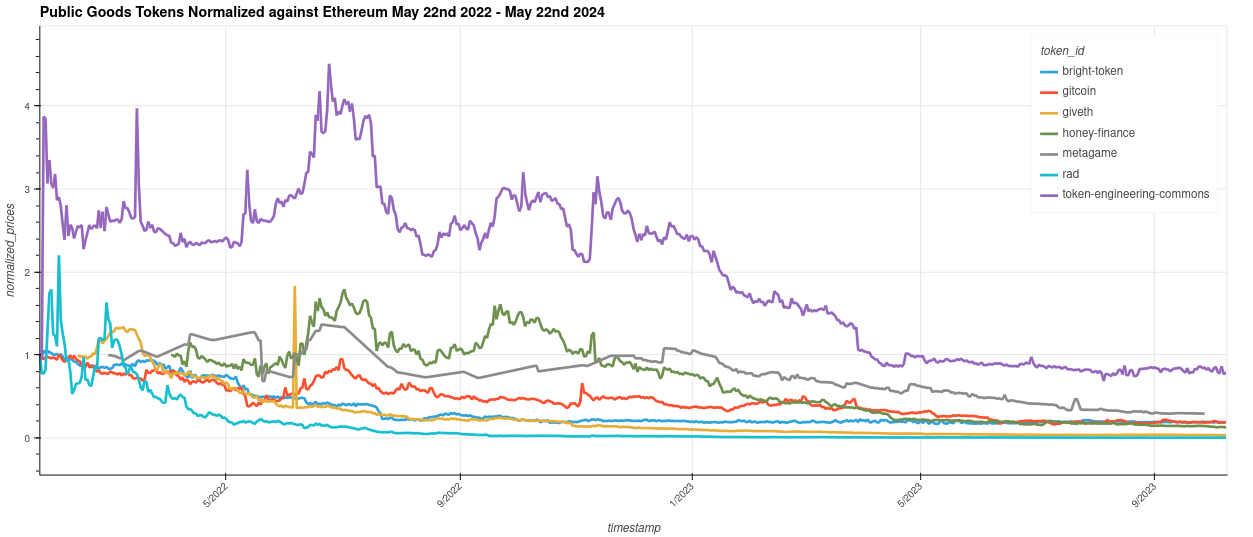

Log plot results:

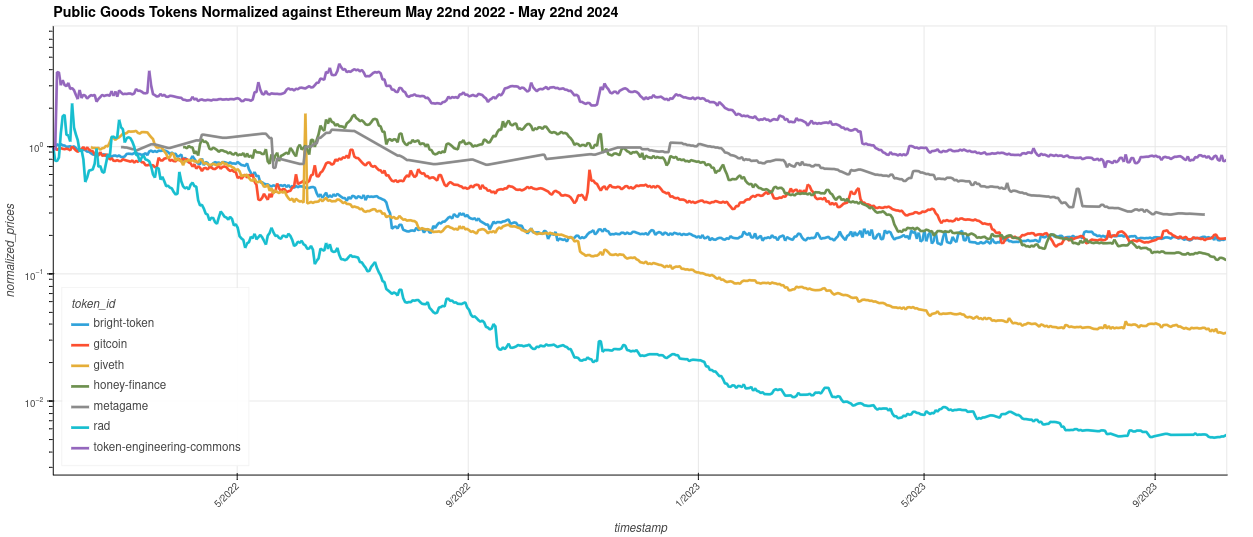

In [9]:
prices_df_adjusted['returns'] = prices_df_adjusted.groupby('token_id')['normalized_prices'].transform(lambda x: x.bfill().pct_change()+1)

In [10]:
prices_df_adjusted[prices_df_adjusted['token_id'] != 'ethereum'].groupby('token_id').agg(
    net_return=('prices', lambda x: x.iloc[-1] / x.iloc[0]),
    mean_return=('returns', 'mean'),
    std=('returns', 'std'),
    sharpe_ratio=('returns', lambda x: (x.mean()-1) / x.std()),
).sort_values('sharpe_ratio', ascending=False)
    

,net_return,mean_return,std,sharpe_ratio
token_id,,,,
token-engineering-commons,0.800977,1.003376,0.132203,0.025538
giveth,0.034875,1.000173,0.168698,0.001028
gitcoin,0.188070,0.998468,0.048799,-0.031402
bright-token,0.187790,0.998419,0.046498,-0.034012
metagame,0.295315,0.997974,0.058484,-0.034643
honey-finance,0.130225,0.997628,0.051467,-0.046095
rad,0.005513,0.994394,0.085873,-0.065277
